## Qual o comportamente dos dados pluviométricos com relação as solicitações?

Para analisarmos esse aspecto iremos estudar de forma exploratória os dados pluviométrico, a fim de estudar seu comportamento, e analisar o seu relacionamento com relação as informações das solicitações 156

## Import de bibliotecas

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline  

## Carregamento dos dados pluviométrico e das solicitações

In [4]:
df_156 = pd.read_hdf('../../data/processed/solicitacoes156.h5', key='data', format="table")
df_plu = pd.read_hdf('../../data/processed/pluviometrico.h5', key='data', format="table")
display(df_156.head())
display(df_plu.head())

,GRUPOSERVICO_CODIGO,GRUPOSERVICO_DESCRICAO,SERVICO_CODIGO,SERVICO_DESCRICAO,LOGRADOURO,NUMERO,BAIRRO,RPA,DATA_DEMANDA,SITUACAO,DATA_ULT_SITUACAO,ANO
0,2,CONSERVACAO,1,REMOCAO DE ANIMAIS MORTOS PEQUENOS,1TR PIRIZAL,3587,VASCO DA GAMA,3,2012-05-03,ATENDIDA,2012-05-03,2012
1,2,CONSERVACAO,1,REMOCAO DE ANIMAIS MORTOS PEQUENOS,1TR SEBASTIAO GRANDE,3587,AREIAS,5,2012-05-10,ATENDIDA,2012-05-10,2012
2,2,CONSERVACAO,1,REMOCAO DE ANIMAIS MORTOS PEQUENOS,AV ANTONIO DE GOES,3578,PINA,6,2012-05-11,ATENDIDA,2012-05-11,2012
3,2,CONSERVACAO,1,REMOCAO DE ANIMAIS MORTOS PEQUENOS,AV BEBERIBE,00,AGUA FRIA,2,2012-09-12,ATENDIDA,2012-09-12,2012
4,2,CONSERVACAO,1,REMOCAO DE ANIMAIS MORTOS PEQUENOS,AV BEIRA RIO,00,MADALENA,4,2012-08-10,ATENDIDA,2012-08-10,2012


,DATA,INDICE
0,2012-04-01,33.0
1,2012-08-01,21.8
2,2012-12-01,0.0
3,2012-02-01,0.0
4,2012-01-01,0.0


## Análise sobre as médias e dispersão gerais, anuais e mensais com relação aos dados pluviométricos

Média geral de indice pluviométrico em Recife: 50.191
Desvio padrão geral de indice pluviométrico em Recife: 115.527


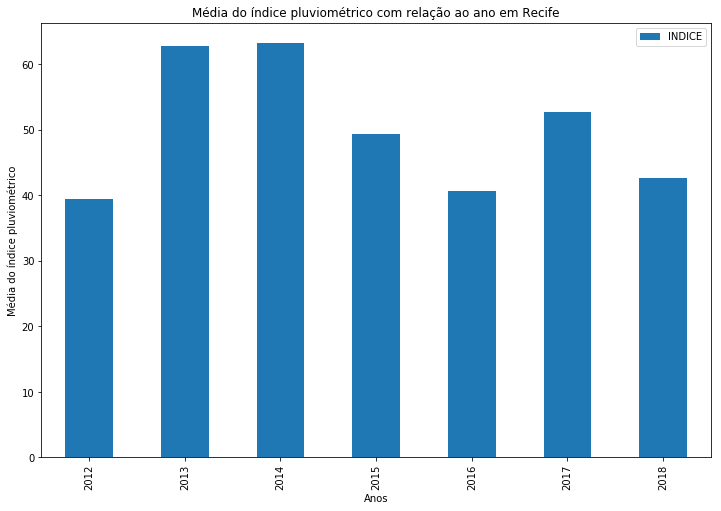

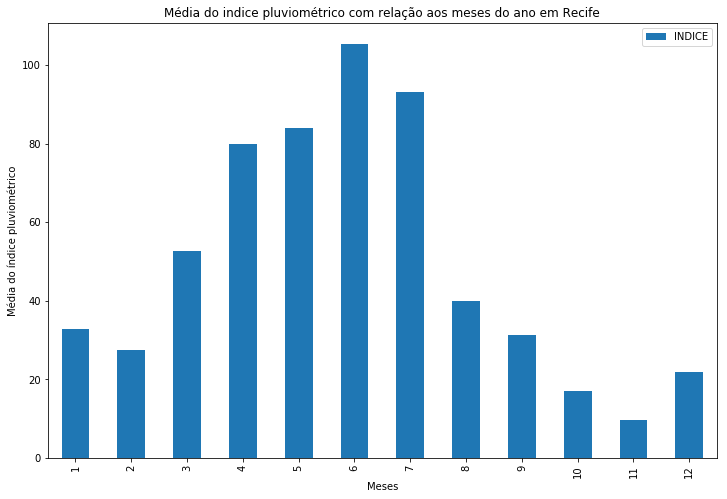

In [43]:
print('Média geral de indice pluviométrico em Recife:', round(df_plu['INDICE'].mean(), 3))
print('Desvio padrão geral de indice pluviométrico em Recife:', round(df_plu['INDICE'].std(), 3))

ax = df_plu.groupby(df_plu['DATA'].dt.year).mean().plot.bar(
    title='Média do índice pluviométrico com relação ao ano em Recife',
    #yerr=df_plu.groupby(df_plu['DATA'].dt.year).std(),
    figsize=(12, 8)
)
ax.set_ylabel('Média do índice pluviométrico')
ax.set_xlabel('Anos')

ax = df_plu.groupby([df_plu['DATA'].dt.month]).mean().plot.bar(
    title='Média do indice pluviométrico com relação aos meses do ano em Recife',
    #yerr=df_plu.groupby(df_plu['DATA'].dt.month).std(),
    figsize=(12, 8)
)
ax.set_ylabel('Média do índice pluviométrico')
aux = ax.set_xlabel('Meses')

## Análise sobre a distribuição dos dados pluviométrico

Histograma dos dados pluviométricos:


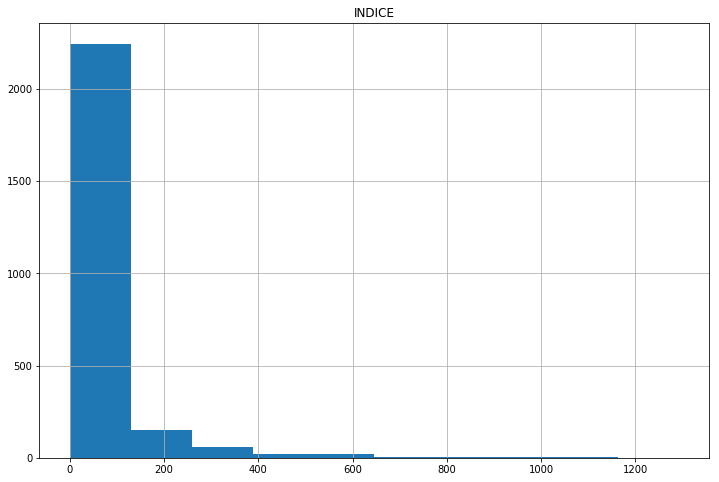

In [41]:
df_plu.hist(figsize=(12, 8))
print('Histograma dos dados pluviométricos:')

## Conclusão

Sobre os dados pluviométricos podemos concluir que em média, Recife possui um volume ponderado de chuvas, cerca de 50mm, e que esse valor tende a se preservar durante os anos, permanecendo na faixa de 40 a 60mm por ano. Observe também que com relação aos meses, Recife parece ter um período chuvoso entre e março e agosto, e um periodo com menor índice de chuvas entre setembro e fevereiro. Podemos resaltar que a dispersão é bem elevada com relação a média, apresentando diferenças significativas durante ao ano. Observe também o histograma, podemos observar uma distribuição normal, onde temos um numero elevado de entenperes leves, muito maior com relação a emtemperes moderadas e elevadas

## Análise dos dados pluviométrico com relação aos dados 

In [72]:
df_156.columns = ['GRUPOSERVICO_CODIGO', 'GRUPOSERVICO_DESCRICAO', 'SERVICO_CODIGO', 'SERVICO_DESCRICAO', 
                  'LOGRADOURO', 'NUMERO', 'BAIRRO', 'RPA', 'DATA', 'SITUACAO', 'DATA_ULT_SITUACAO', 'ANO']
merged_df = pd.merge(left=df_156, right=df_plu, on='DATA')
groups_df = pd.get_dummies(merged_df['GRUPOSERVICO_DESCRICAO'])
concat_df = pd.concat([merged_df, groups_df], axis=1)
final_df = concat_df[['DATA', 'INDICE'] + list(groups_df.columns)].groupby('DATA')
corr_df = pd.concat([final_df['INDICE'].mean(), final_df[groups_df.columns].sum()], axis=1).corr()

In [74]:
for i in range(corr_df.shape[0]):
    corr_df.values[i, i] = 0

In [90]:
cols = corr_df.columns.values
new_cols = []
for i in range(cols.shape[0]):
    for j in range(i, cols.shape[0]):
        maximum = corr_df.iloc[i, j]
        if maximum >= 0.5:
            new_cols.append(cols[i])
new_cols = list(set(new_cols))

result = corr_df.loc[new_cols, new_cols]
for i in range(len(new_cols)):
    result.iloc[i, i] = 1

result

,COLETA URBANA,ARBORIZACAO,LUMINARIAS,FISCALIZACAO URBANA,DRENAGEM,ILUMINACAO RELUZ,LIMPEZA URBANA,ILUMINACAO PUBLICA
COLETA URBANA,1.000000,0.315416,0.221509,0.292810,0.423729,0.364739,0.581914,0.450599
ARBORIZACAO,0.315416,1.000000,0.563698,0.452745,0.675619,0.200603,0.553770,0.663692
LUMINARIAS,0.221509,0.563698,1.000000,0.446272,0.551621,0.306152,0.493671,0.562694
FISCALIZACAO URBANA,0.292810,0.452745,0.446272,1.000000,0.516114,0.242932,0.576597,0.532304
DRENAGEM,0.423729,0.675619,0.551621,0.516114,1.000000,0.343556,0.721212,0.763058
ILUMINACAO RELUZ,0.364739,0.200603,0.306152,0.242932,0.343556,1.000000,0.553679,0.225721
LIMPEZA URBANA,0.581914,0.553770,0.493671,0.576597,0.721212,0.553679,1.000000,0.745859
ILUMINACAO PUBLICA,0.450599,0.663692,0.562694,0.532304,0.763058,0.225721,0.745859,1.000000


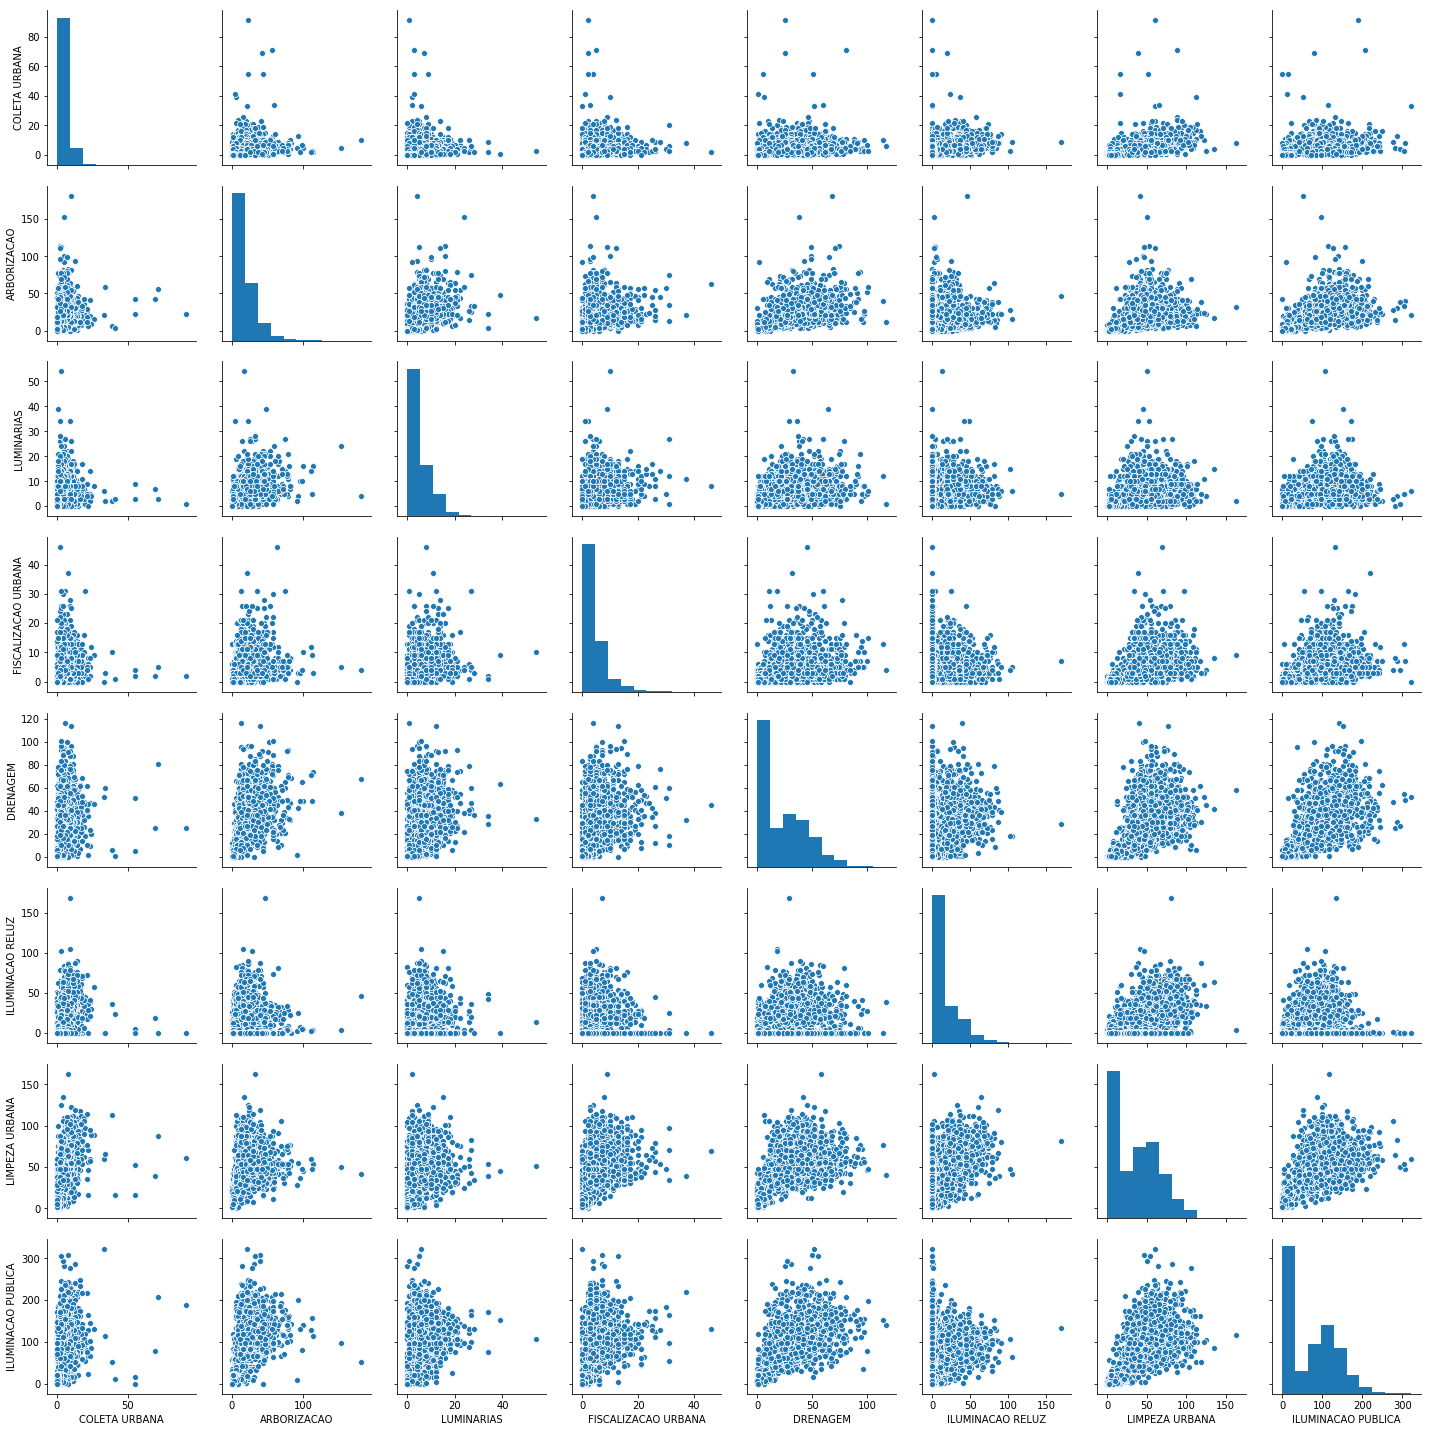

In [93]:
sns.pairplot(pd.concat([final_df['INDICE'].mean(), final_df[groups_df.columns].sum()], axis=1)[result.columns])

In [ ]:
ma